This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, we check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

PART (a): This part serves as a warm-up, getting  familiar with the kind of code we will be writing in this project. Note that throughout part (a), the code does **not** use spaCy.

**Subpart i.** We write a loop that iterates through all 100 books; for each book, we print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

The output looks like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [1]:
import glob
for i in range(0,100):
    with open(glob.glob('./HW1_Dataset/*.txt')[i], 'r') as f:
        text = f.read()
        print(glob.glob('./HW1_Dataset/*.txt')[i] + ' ', len(text))

./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt  3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt  1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt  441034
./HW1_Dataset/The King James Version of the Bible (132).txt  4351846
./HW1_Dataset/Et dukkehjem. English by Henrik Ibsen (557).txt  161241
./HW1_Dataset/Outpost in the Wilderness_ Fort Wayne, 1706-1828 by Charles Poinsatte (161).txt  363234
./HW1_Dataset/The Romance of Lust_ A Classic Victorian erotic novel by Anonymous (294).txt  1051148
./HW1_Dataset/The Odyssey by Homer (124).txt  697404
./HW1_Dataset/A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt  765918
./HW1_Dataset/The Philosophy of Spiritual Activity by Rudolf Steiner (144).txt  545031
./HW1_Dataset/My Fifteen Lost Years by Florence Elizabeth Maybrick (499).txt  383694
./HW1_Dataset/Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).txt  11

**Subpart ii.** Now we print out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, we write the code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```


In [2]:
list_of_files = dict()
for i in range(0,100):
    with open(glob.glob('./HW1_Dataset/*.txt')[i], 'r') as f:
        text = f.read()
        list_of_files[glob.glob('./HW1_Dataset/*.txt')[i]] = len(text)
        
list_of_files = sorted(list_of_files.items(), key=lambda x:x[1], reverse = True) 
for i in range(0,15):
    print(i+1,'. ', list_of_files[i][1], ' ', list_of_files[i][0].split('/')[-1], sep = '')

1. 5465100 The Complete Works of William Shakespeare by William Shakespeare (132).txt
2. 4351846 The King James Version of the Bible (132).txt
3. 3254333 Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4. 3227580 War and Peace by graf Leo Tolstoy (251).txt
5. 3033575 Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
6. 2643849 The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7. 1534140 Ulysses by James Joyce (282).txt
8. 1378627 My Secret Life, Volumes I. to III. by Anonymous (157).txt
9. 1238569 Moby Dick; Or, The Whale by Herman Melville (413).txt
10. 1231784 Leviathan by Thomas Hobbes (417).txt
11. 1214387 The Republic by Plato (246).txt
12. 1200021 The History of the Peloponnesian War by Thucydides (122).txt
13. 1175588 The Iliad by Homer (256).txt
14. 1167141 The Federalist Papers by Alexander Hamilton and John Jay and James Madison (116).txt
15. 1154508 Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).tx

**Subpart iii.** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

In [3]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now we write a loop that goes through all 100 books again. However, for each book, we split it up into batches so that each batch has at most 10000 words. In this case, we check number of batches there are in total across all 100 books. The code prints out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [4]:
import numpy as np

def batch_split(directory, words_per_batch):
    # creating a list of all the words
    all_books_batches = []
    for i in range(0,100):
        words_split_on_spaces = []
        with open(glob.glob(directory)[i], 'r') as f:
            text = f.read()
            words_split_on_spaces.extend(text.split(' '))
            
        # creating all the batches
        num_book_pieces = int(np.ceil(len(words_split_on_spaces) / words_per_batch))
        batches = []
        for piece_idx in range(num_book_pieces):
            start_idx = piece_idx * words_per_batch
            end_idx = (piece_idx + 1) * words_per_batch
            if end_idx > len(words_split_on_spaces):
                end_idx = len(words_split_on_spaces)
            book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
            batches.append(book_piece)
        all_books_batches.extend(batches)
    return all_books_batches
all_batches = batch_split('./HW1_Dataset/*.txt',10000)
print("Total number of batches: ", len(all_batches))

Total number of batches:  1246


**PART (b)** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, we do not remove stopwords.**

Now we build a term frequency (raw counts) table that is for all 100 books. Specifically, building on our solution to part (a)-subpart iii, read in a single book at a time and for each book, we do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **we do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--and not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): we do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, we get the term frequency table for the entire corpus (importantly, the frequency table is not just for a single book; it is for all 100 books). Then we sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, we only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, we would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [5]:
import spacy
import re
from collections import Counter

pattern = '[a-zA-Z]+$'
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

In [6]:
from tqdm.notebook import tqdm

def word_freq_counter(all_books_batches):
    histogram = Counter()
    for batches in tqdm(all_books_batches):
        # Parsing text in each batch
        parsed_text = nlp(batches)
        for token in parsed_text:
            lemma = token.lemma_
            if re.match(r'^[a-zA-Z]+$', lemma):
                histogram[lemma] += 1
    return histogram.most_common()

In [7]:
sorted_token_count_pairs = word_freq_counter(all_batches)

  0%|          | 0/1246 [00:00<?, ?it/s]

In [8]:
for rank, (token, count) in enumerate(sorted_token_count_pairs[:50], start = 1):
        print(rank, token, ":", count)

1 the : 702465
2 be : 436114
3 and : 435424
4 of : 386347
5 to : 324409
6 I : 255129
7 a : 233423
8 in : 204252
9 he : 193622
10 that : 159010
11 have : 158746
12 it : 135431
13 not : 111854
14 his : 108536
15 you : 102595
16 with : 101227
17 they : 96821
18 for : 95320
19 as : 90702
20 she : 78524
21 but : 75599
22 my : 73983
23 do : 68758
24 at : 64947
25 on : 62833
26 by : 61274
27 this : 61240
28 we : 60300
29 which : 58868
30 all : 58636
31 say : 58348
32 from : 50095
33 so : 47999
34 or : 47810
35 her : 42838
36 one : 41123
37 will : 40920
38 man : 39585
39 their : 38418
40 what : 37851
41 no : 37808
42 there : 37209
43 if : 34898
44 go : 33899
45 when : 33587
46 an : 32517
47 come : 32358
48 see : 32024
49 would : 31289
50 who : 30934


**(c)** Now lets we visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this is for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

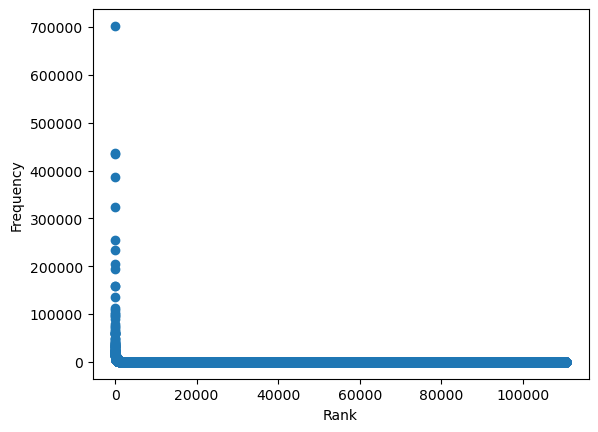

In [9]:
# Raw scatter plot
import matplotlib.pyplot as plt

rank = list(range(1, len(sorted_token_count_pairs) + 1))
frequencies = [count for (token, count) in sorted_token_count_pairs]

plt.scatter(rank, frequencies)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.show()

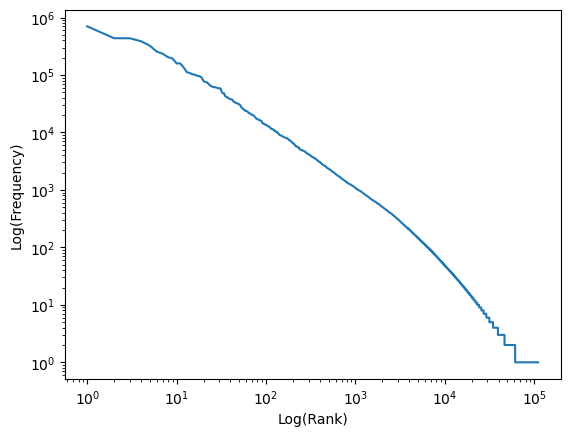

In [10]:
# Log-log plot
import numpy as np
plt.loglog(rank, frequencies)
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.show()

**(d)** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Lets answer the following questions:

**What do you observe in the log-log plot above? Is this consist with the power law?**

𝑓(𝑟)=𝑐𝑟^-1
From this function we can understand that frequency is inversely propotional to r i.e. rank of the word. In the log-log plot we can see that as the rank increases frequency decreases and are thus consistent with the power law. We can also see the slope of the plot, since it is close to -1 we can conclude that it is consistent with power law.

**Subpart ii.** Think of the corpus as a (large) unigram bag of words. Imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphabetic words; thus what remains in the bag are actually alphabetic lemmas). What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas? 

In [11]:
print('Probability of drawing one of the 4 most frequent alphabetic lemmas: ')

sum_of_frequencies = sum(frequencies)

probability_top_4 = 0
for token,count in sorted_token_count_pairs[:4]:
    probability_top_4 += (count/sum_of_frequencies)
print(probability_top_4)

print('Probability of drawing one of the 50 most frequent alphabetic lemmas: ')

probability_top_50 = 0
for token,count in sorted_token_count_pairs[:50]:
    probability_top_50 += (count/sum_of_frequencies)
print(probability_top_50)

Probability of drawing one of the 4 most frequent alphabetic lemmas: 
0.16223575913317353
Probability of drawing one of the 50 most frequent alphabetic lemmas: 
0.483136162423952


**Subpart iii.** What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [12]:
print("Occur only once: ")

one_occurrence = 0
for token,count in sorted_token_count_pairs:
    if count == 1:
        one_occurrence += 1
proportion_one_occurrence = one_occurrence/rank[-1]
print(proportion_one_occurrence)

print("Occur fewer than 10 times: ")

ten_occurrences = 0
for token,count in sorted_token_count_pairs:
    if count < 10:
        ten_occurrences += 1
proportion_ten_occurrence = ten_occurrences/rank[-1]
print(proportion_ten_occurrence)

Occur only once: 
0.44752296068407005
Occur fewer than 10 times: 
0.7815500158349545


### Entity Recognition and Pointwise Mutual Information (PMI) 
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. We used the Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, we downloaded the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


In [13]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/khushalidaga/nltk_data...
[nltk_data]   Unzipping corpora/reuters.zip.


True

**(a)** Let's now draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label.

In [14]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]

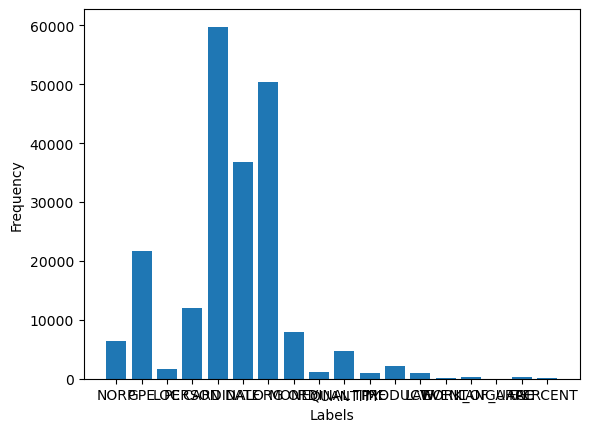

In [15]:
label_counter = Counter()
for doc in reuters_nlp:
    for ent in doc.ents:
        label_counter[ent.label_] += 1
        
labels, frequency = zip(*label_counter.items())
plt.bar(labels, frequency)
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()


**(b)** Now let's list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately listing the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively.

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [16]:
ORG_counter = Counter()
GPE_counter = Counter()

for doc in reuters_nlp:
    org_set = set()
    gpe_set = set()
    for ent in doc.ents:
        if ent.label_ == "ORG":
            org_set.add(ent.text.lower())
        elif ent.label_ == "GPE":
            gpe_set.add(ent.text.lower())
    for org in org_set:
        ORG_counter[org] += 1
    for gpe in gpe_set:
        GPE_counter[gpe] += 1
    
print('10 most common entities with label ORG')
for token, count in ORG_counter.most_common()[:10]:
    print(token, ': ', count)
    
print()
print('10 most common entities with label GPE')
for token, count in GPE_counter.most_common()[:10]:
    print(token, ': ', count)

10 most common entities with label ORG
cts :  1115
reuters :  444
the securities and exchange commission :  248
ec :  231
fed :  230
treasury :  228
cts net :  179
the u.s. agriculture department :  170
usda :  154
the bank of england :  143

10 most common entities with label GPE
u.s. :  1631
japan :  579
the united states :  383
u.k. :  297
canada :  295
new york :  251
west germany :  236
washington :  230
london :  216
brazil :  201


**(c)** Let's now look at the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: When computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [17]:
all_pairs = [(GPE, 'opec') for GPE in GPE_counter]

In [18]:
opec_gpe_count = Counter()
opec_count = 0
gpe_count = Counter()
for doc in reuters_nlp:
    org_entities = {token.text.lower() for token in doc.ents if token.label_ == 'ORG'}
    gpe_entities = {token.text.lower() for token in doc.ents if token.label_ == 'GPE'}
    if 'opec' in org_entities:
        opec_count += 1
        for gpe in gpe_entities:
            opec_gpe_count[(gpe, 'opec')] += 1
            gpe_count[gpe] += 1


PMI_calc = []
for (gpe, opec), co_occ in opec_gpe_count.items():
    p_opec = opec_count / len(reuters_nlp)
    p_gpe = GPE_counter[gpe] / len(reuters_nlp)
    p_opec_gpe = co_occ / len(reuters_nlp)
    PMI = p_opec_gpe / (p_gpe)
    PMI_calc.append((gpe, PMI))

print(sorted(PMI_calc, key = lambda a: a[1], reverse = True)[:50])

[('brent', 1.0), ('ula fields', 1.0), ('emirates', 1.0), ('the lake charles', 1.0), ('bethesda', 1.0), ('franco', 1.0), ('gabon', 1.0), ('opec', 1.0), ('saudi arabia reiterates commitment to', 1.0), ('yanbu', 1.0), ('el salado', 1.0), ('aguarico', 1.0), ('jubail', 1.0), ('ras tanurah', 1.0), ("ju'aymah", 1.0), ('tripoli', 1.0), ('doha', 1.0), ('guayaquil', 1.0), ('tihamah', 1.0), ('redoglia', 1.0), ('carrington', 1.0), ('materialy', 1.0), ('vienna', 0.85), ('riyadh', 0.7999999999999999), ("saudi arabia's", 0.6875), ('balao', 0.6666666666666666), ('quito', 0.6666666666666666), ('qatar', 0.5769230769230769), ('dubai', 0.5714285714285714), ('caracas', 0.5555555555555556), ('nigeria', 0.5), ('kahan', 0.5), ('nordic', 0.5), ('statfjord', 0.5), ('oseberg', 0.5), ('la', 0.5), ('dunham', 0.5), ('libya', 0.4615384615384615), ('ecuador', 0.43859649122807015), ('saudi arabia', 0.42187500000000006), ('kuwait', 0.39705882352941174), ('the united arab emirates', 0.37931034482758613), ('venezuela', 0

Suprisingly, the PMI value of GPE entities from brent materialy have the same value. Which is very unusal and it implies that all the entities have the same number of co-occurrences with opec in all documents i.e. 1.0. In reality we expect certain variations in the value suggesting that certain entities have stronger association with opec. This might be due to data limitation. We are not dividing the PMI with probability of opec as that would be the same for all the GPE entities.

Another unusual thing is we have the entity opec that has a label of GPE, so there might be words like Opec or OPEC in the document that are labeled as GPE.